PROBLEM DESCRIPTION


A hypothetical bike sharing company named "Cyclistic" has two different types of customer's. The customers who purchased the membership of the company are member customers and the customers who use cyclistic's bike on daily pay basis are casual customers. The company's aim is to convert the casual customer into member customer to increase the profit of company.
The task of this project is to analyse that " **How do annual members and casual riders use Cyclistic bikes differently?"**. 


# Importing libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopy.distance as dist
import matplotlib.gridspec as gridspec
import seaborn as sns
import datetime as dt
import calendar

# Importing the dataset


Past 12 months datasets are downloaded from the website *https://divvy-tripdata.s3.amazonaws.com/index.html* . These datasets contains field like ride_id,	rideable_type= types of bikes cyclistic offer's,	started_at=journey start date and time,	ended_at= journey end date and time,	start_station_name,	start_station_id,	end_station_name,	end_station_id,	start_lat= start latitude,	start_lng= start longitude,	end_lat= end latitude,	end_lng= end longitude, and	member_casual= type of customer's.

data importing for normal machine to work with pycharm or jupiter

df1 = pd.read_csv(r"C:\Users\dell\Desktop\Coursera\8. Google Data Analytics Capstone\dataset\202008-divvy-tripdata.csv")

df2 = pd.read_csv(r"C:\Users\dell\Desktop\Coursera\8. Google Data Analytics Capstone\dataset\202009-divvy-tripdata.csv") 

df3 = pd.read_csv(r"C:\Users\dell\Desktop\Coursera\8. Google Data Analytics Capstone\dataset\202010-divvy-tripdata.csv") 

df4 = pd.read_csv(r"C:\Users\dell\Desktop\Coursera\8. Google Data Analytics Capstone\dataset\202011-divvy-tripdata.csv") 

df5 = pd.read_csv(r"C:\Users\dell\Desktop\Coursera\8. Google Data Analytics Capstone\dataset\202012-divvy-tripdata.csv") 

df6 = pd.read_csv(r"C:\Users\dell\Desktop\Coursera\8. Google Data Analytics Capstone\dataset\202101-divvy-tripdata.csv") 

df7 = pd.read_csv(r"C:\Users\dell\Desktop\Coursera\8. Google Data Analytics Capstone\dataset\202102-divvy-tripdata.csv") 

df8 = pd.read_csv(r"C:\Users\dell\Desktop\Coursera\8. Google Data Analytics Capstone\dataset\202103-divvy-tripdata.csv") 

df9 = pd.read_csv(r"C:\Users\dell\Desktop\Coursera\8. Google Data Analytics Capstone\dataset\202104-divvy-tripdata.csv") 

df10 = pd.read_csv(r"C:\Users\dell\Desktop\Coursera\8. Google Data Analytics Capstone\dataset\202105-divvy-tripdata.csv") 

df11 = pd.read_csv(r"C:\Users\dell\Desktop\Coursera\8. Google Data Analytics Capstone\dataset\202106-divvy-tripdata.csv") 

df12 = pd.read_csv(r"C:\Users\dell\Desktop\Coursera\8. Google Data Analytics Capstone\dataset\202107-divvy-tripdata.csv")

working with google colab needs mounting of google drive to colab

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


loading data into google colab

In [5]:
df1 =pd.read_csv('drive/MyDrive/project_python/202008-divvy-tripdata.csv')
df2 =pd.read_csv('drive/MyDrive/project_python/202009-divvy-tripdata.csv')
df3 =pd.read_csv('drive/MyDrive/project_python/202010-divvy-tripdata.csv')
df4 =pd.read_csv('drive/MyDrive/project_python/202011-divvy-tripdata.csv')
df5 =pd.read_csv('drive/MyDrive/project_python/202012-divvy-tripdata.csv')
df6 =pd.read_csv('drive/MyDrive/project_python/202101-divvy-tripdata.csv')
df7 =pd.read_csv('drive/MyDrive/project_python/202102-divvy-tripdata.csv')
df8 =pd.read_csv('drive/MyDrive/project_python/202103-divvy-tripdata.csv')
df9 =pd.read_csv('drive/MyDrive/project_python/202104-divvy-tripdata.csv')
df10 =pd.read_csv('drive/MyDrive/project_python/202105-divvy-tripdata.csv')
df11 =pd.read_csv('drive/MyDrive/project_python/202106-divvy-tripdata.csv')
df12 =pd.read_csv('drive/MyDrive/project_python/202107-divvy-tripdata.csv')

merging 12 different dataframe into single dataframe

In [6]:
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
df = pd.concat(dfs, join='outer', axis=0,ignore_index=True)

# Dataset exploration


In [7]:
df.shape  #checking dimention of dataframe,df

(4731081, 13)

In [8]:
df.head() #printing top 5 rows

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329,Clark St & Lincoln Ave,141,41.932588,-87.636427,41.915689,-87.634600,member
1,2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168,Michigan Ave & 14th St,168,41.864379,-87.623681,41.864221,-87.623439,casual
2,67DC1D133E8B5816,electric_bike,2020-08-26 19:44:14,2020-08-26 21:53:07,Columbus Dr & Randolph St,195,State St & Randolph St,44,41.884641,-87.619549,41.884971,-87.627574,casual
3,C79FBBD412E578A7,electric_bike,2020-08-27 12:05:41,2020-08-27 12:53:45,Daley Center Plaza,81,State St & Kinzie St,47,41.884093,-87.629639,41.889583,-87.627540,casual
4,13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658,Leavitt St & Division St,658,41.902989,-87.683767,41.903002,-87.683844,casual


In [9]:
df.tail() #printing bottom 5 rows

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
4731076,1E660BF8DCDAAAB6,electric_bike,2021-07-04 10:40:41,2021-07-04 11:30:13,NaN,NaN,NaN,NaN,41.72,-87.68,41.77,-87.66,member
4731077,A2448BDFD9B3653D,electric_bike,2021-07-04 12:47:41,2021-07-04 12:54:46,NaN,NaN,NaN,NaN,41.77,-87.66,41.78,-87.66,member
4731078,2D612BF8530379DA,electric_bike,2021-07-03 21:41:58,2021-07-03 21:57:14,NaN,NaN,NaN,NaN,41.72,-87.68,41.72,-87.68,member
4731079,6D615D18B765C9B3,electric_bike,2021-07-03 22:10:31,2021-07-03 22:11:39,NaN,NaN,NaN,NaN,41.72,-87.68,41.72,-87.68,member
4731080,0F31D311323F0048,electric_bike,2021-07-04 07:03:50,2021-07-04 07:32:38,NaN,NaN,NaN,NaN,41.72,-87.68,41.72,-87.68,member


In [10]:
df.count() #checking number of values filled in different field

ride_id               4731081
rideable_type         4731081
started_at            4731081
ended_at              4731081
start_station_name    4361899
start_station_id      4361277
end_station_name      4323781
end_station_id        4323322
start_lat             4731081
start_lng             4731081
end_lat               4725834
end_lng               4725834
member_casual         4731081
dtype: int64

In [11]:
df.info() # checking datatype of all fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4731081 entries, 0 to 4731080
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 469.2+ MB


In [12]:
df.isnull().sum() #finding number of null values in different fileds

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    369182
start_station_id      369804
end_station_name      407300
end_station_id        407759
start_lat                  0
start_lng                  0
end_lat                 5247
end_lng                 5247
member_casual              0
dtype: int64

# Data cleaning


In [13]:
df.dropna(axis=0, how='any', inplace= True)  #droping all null values from all fields

In [14]:
df.loc[~df.index.duplicated(), :]  # removing dublicate index

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329,Clark St & Lincoln Ave,141,41.932588,-87.636427,41.915689,-87.634600,member
1,2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168,Michigan Ave & 14th St,168,41.864379,-87.623681,41.864221,-87.623439,casual
2,67DC1D133E8B5816,electric_bike,2020-08-26 19:44:14,2020-08-26 21:53:07,Columbus Dr & Randolph St,195,State St & Randolph St,44,41.884641,-87.619549,41.884971,-87.627574,casual
3,C79FBBD412E578A7,electric_bike,2020-08-27 12:05:41,2020-08-27 12:53:45,Daley Center Plaza,81,State St & Kinzie St,47,41.884093,-87.629639,41.889583,-87.627540,casual
4,13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658,Leavitt St & Division St,658,41.902989,-87.683767,41.903002,-87.683844,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4730970,4AD181F39CCB99ED,classic_bike,2021-07-12 17:42:02,2021-07-12 17:45:44,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,41.889177,-87.638506,41.888716,-87.644448,member
4731009,834BDE579A88FA22,electric_bike,2021-07-27 16:08:22,2021-07-27 16:09:04,Kingsbury St & Kinzie St,KA1503000043,Kingsbury St & Kinzie St,KA1503000043,41.889167,-87.638474,41.889186,-87.638539,member
4731011,D6AE7BEA1D494E4B,classic_bike,2021-07-17 17:01:24,2021-07-17 17:38:14,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,41.900960,-87.623777,member
4731025,1C4C22D050DCED54,classic_bike,2021-07-19 16:29:44,2021-07-19 16:30:35,Dearborn St & Monroe St,TA1305000006,Dearborn St & Monroe St,TA1305000006,41.881320,-87.629521,41.881320,-87.629521,member


In [15]:
df.shape

(4167399, 13)

In [16]:
df['start_date'] = pd.to_datetime(df['started_at']).dt.date
df['start_time'] = pd.to_datetime(df['started_at']).dt.time
df['end_date'] = pd.to_datetime(df['ended_at']).dt.date
df['end_time'] = pd.to_datetime(df['ended_at']).dt.time

In [17]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time
0,322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329,Clark St & Lincoln Ave,141,41.932588,-87.636427,41.915689,-87.634600,member,2020-08-20,18:08:14,2020-08-20,18:17:51
1,2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168,Michigan Ave & 14th St,168,41.864379,-87.623681,41.864221,-87.623439,casual,2020-08-27,18:46:04,2020-08-27,19:54:51
2,67DC1D133E8B5816,electric_bike,2020-08-26 19:44:14,2020-08-26 21:53:07,Columbus Dr & Randolph St,195,State St & Randolph St,44,41.884641,-87.619549,41.884971,-87.627574,casual,2020-08-26,19:44:14,2020-08-26,21:53:07
3,C79FBBD412E578A7,electric_bike,2020-08-27 12:05:41,2020-08-27 12:53:45,Daley Center Plaza,81,State St & Kinzie St,47,41.884093,-87.629639,41.889583,-87.627540,casual,2020-08-27,12:05:41,2020-08-27,12:53:45
4,13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658,Leavitt St & Division St,658,41.902989,-87.683767,41.903002,-87.683844,casual,2020-08-27,16:49:02,2020-08-27,16:59:49


In [18]:
df = df[df['started_at']<df['ended_at']]

In [19]:
df['start_lng']= df['start_lng']*(-1)

In [20]:
df['end_lng']= df['end_lng']*(-1)

In [21]:
df['started_at'] = pd.to_datetime(df['started_at']) #changing datatype of field
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [22]:
#df['start_date'] = pd.to_datetime(df['start_date'])
#df['end_date'] = pd.to_datetime(df['end_date'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4159132 entries, 0 to 4731030
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  start_date          object        
 14  start_time          object        
 15  end_date            object        
 16  end_time            object        
dtypes: datetime64[ns](2), float64(4), object(11)
memory usage: 571.2+ MB


In [24]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time
0,322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329,Clark St & Lincoln Ave,141,41.932588,87.636427,41.915689,87.634600,member,2020-08-20,18:08:14,2020-08-20,18:17:51
1,2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168,Michigan Ave & 14th St,168,41.864379,87.623681,41.864221,87.623439,casual,2020-08-27,18:46:04,2020-08-27,19:54:51
2,67DC1D133E8B5816,electric_bike,2020-08-26 19:44:14,2020-08-26 21:53:07,Columbus Dr & Randolph St,195,State St & Randolph St,44,41.884641,87.619549,41.884971,87.627574,casual,2020-08-26,19:44:14,2020-08-26,21:53:07
3,C79FBBD412E578A7,electric_bike,2020-08-27 12:05:41,2020-08-27 12:53:45,Daley Center Plaza,81,State St & Kinzie St,47,41.884093,87.629639,41.889583,87.627540,casual,2020-08-27,12:05:41,2020-08-27,12:53:45
4,13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658,Leavitt St & Division St,658,41.902989,87.683767,41.903002,87.683844,casual,2020-08-27,16:49:02,2020-08-27,16:59:49


# Data analysis

In [25]:
start_lat = list(df['start_lat'])
start_lng = list(df['start_lng'])
end_lat = list(df['end_lat'])
end_lng = list(df['end_lng'])

Distance calculation with latitude and longitude using geopy.distance

distances = [ ]

for i in range(0,4167399):

    start= (start_lat[i], start_lng[i])
    destination= (end_lat[i], end_lng[i])
    distance_travelled = dist.distance(start,destination)
    distances.append(distance_travelled)
 

df['distance_travel']= distances

In [26]:
df['trip_duration']= df['ended_at']-df['started_at']

In [27]:
df['trip_duration_hrs']= df['trip_duration'].apply(lambda x : (x.total_seconds())/3600)

In [28]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time,trip_duration,trip_duration_hrs
0,322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329,Clark St & Lincoln Ave,141,41.932588,87.636427,41.915689,87.634600,member,2020-08-20,18:08:14,2020-08-20,18:17:51,0 days 00:09:37,0.160278
1,2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168,Michigan Ave & 14th St,168,41.864379,87.623681,41.864221,87.623439,casual,2020-08-27,18:46:04,2020-08-27,19:54:51,0 days 01:08:47,1.146389
2,67DC1D133E8B5816,electric_bike,2020-08-26 19:44:14,2020-08-26 21:53:07,Columbus Dr & Randolph St,195,State St & Randolph St,44,41.884641,87.619549,41.884971,87.627574,casual,2020-08-26,19:44:14,2020-08-26,21:53:07,0 days 02:08:53,2.148056
3,C79FBBD412E578A7,electric_bike,2020-08-27 12:05:41,2020-08-27 12:53:45,Daley Center Plaza,81,State St & Kinzie St,47,41.884093,87.629639,41.889583,87.627540,casual,2020-08-27,12:05:41,2020-08-27,12:53:45,0 days 00:48:04,0.801111
4,13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658,Leavitt St & Division St,658,41.902989,87.683767,41.903002,87.683844,casual,2020-08-27,16:49:02,2020-08-27,16:59:49,0 days 00:10:47,0.179722


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4159132 entries, 0 to 4731030
Data columns (total 19 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  start_date          object         
 14  start_time          object         
 15  end_date            object         
 16  end_time            object         
 17  trip_duration       timedelta64[ns]
 18  trip_duration_hrs   float64        
dtypes: datetime64[ns](2),

In [30]:
df.sort_values(by=['trip_duration_hrs','start_date'],ascending=False) #sorting the dataframe by trip_duration_hrs

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time,trip_duration,trip_duration_hrs
3774759,F043F0F6A1AA4F85,docked_bike,2021-06-05 02:27:26,2021-07-13 22:51:35,Michigan Ave & Lake St,TA1305000011,Malcolm X College Vaccination Site,631,41.886024,87.624117,41.877618,87.673895,casual,2021-06-05,02:27:26,2021-07-13,22:51:35,38 days 20:24:09,932.402500
3724552,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,Streeter Dr & Grand Ave,13022,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.892278,87.612043,41.889955,87.680651,casual,2021-06-04,22:03:33,2021-07-13,14:15:14,38 days 16:11:41,928.194722
858463,F6A59D72627F2711,docked_bike,2020-09-02 18:34:33,2020-10-10 11:17:54,Rush St & Superior St,161,Kingsbury St & Kinzie St,133,41.895765,87.625908,41.889177,87.638506,casual,2020-09-02,18:34:33,2020-10-10,11:17:54,37 days 16:43:21,904.722500
2693764,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,State St & Van Buren St,TA1305000035,Wells St & Polk St,SL-011,41.877181,87.627844,41.872596,87.633502,casual,2021-05-02,02:56:07,2021-06-08,13:37:43,37 days 10:41:36,898.693333
3260789,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,Clark St & Lake St,KA1503000012,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.886021,87.630876,41.889955,87.680651,casual,2021-06-05,23:33:51,2021-07-12,13:55:14,36 days 14:21:23,878.356389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5648,A5C22D88EEAE9C21,electric_bike,2020-08-02 13:42:41,2020-08-02 13:42:42,WATSON TESTING - DIVVY,676,WATSON TESTING - DIVVY,676,41.894767,87.730904,41.894771,87.730906,casual,2020-08-02,13:42:41,2020-08-02,13:42:42,0 days 00:00:01,0.000278
5664,AD8786AB071ED165,electric_bike,2020-08-02 15:16:51,2020-08-02 15:16:52,WATSON TESTING - DIVVY,676,WATSON TESTING - DIVVY,676,41.894666,87.730982,41.894688,87.730995,casual,2020-08-02,15:16:51,2020-08-02,15:16:52,0 days 00:00:01,0.000278
59185,B7088D413F102E73,electric_bike,2020-08-01 14:55:12,2020-08-01 14:55:13,WATSON TESTING - DIVVY,676,WATSON TESTING - DIVVY,676,41.894748,87.730911,41.894754,87.730901,casual,2020-08-01,14:55:12,2020-08-01,14:55:13,0 days 00:00:01,0.000278
519342,977FF7C9AB1A6898,electric_bike,2020-08-01 13:31:52,2020-08-01 13:31:53,Jefferson St & Monroe St,73,Jefferson St & Monroe St,73,41.880413,87.642872,41.880403,87.642860,member,2020-08-01,13:31:52,2020-08-01,13:31:53,0 days 00:00:01,0.000278


In [31]:
df['rideable_type'].unique() # checking for different types of bikes used by customers

array(['docked_bike', 'electric_bike', 'classic_bike'], dtype=object)

In [32]:
rideable_types=['classic_bike', 'docked_bike','electric_bike']

In [33]:
df['day_of_journey'] =df['started_at'].dt.dayofweek

In [34]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time,trip_duration,trip_duration_hrs,day_of_journey
0,322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329,Clark St & Lincoln Ave,141,41.932588,87.636427,41.915689,87.634600,member,2020-08-20,18:08:14,2020-08-20,18:17:51,0 days 00:09:37,0.160278,3
1,2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168,Michigan Ave & 14th St,168,41.864379,87.623681,41.864221,87.623439,casual,2020-08-27,18:46:04,2020-08-27,19:54:51,0 days 01:08:47,1.146389,3
2,67DC1D133E8B5816,electric_bike,2020-08-26 19:44:14,2020-08-26 21:53:07,Columbus Dr & Randolph St,195,State St & Randolph St,44,41.884641,87.619549,41.884971,87.627574,casual,2020-08-26,19:44:14,2020-08-26,21:53:07,0 days 02:08:53,2.148056,2
3,C79FBBD412E578A7,electric_bike,2020-08-27 12:05:41,2020-08-27 12:53:45,Daley Center Plaza,81,State St & Kinzie St,47,41.884093,87.629639,41.889583,87.627540,casual,2020-08-27,12:05:41,2020-08-27,12:53:45,0 days 00:48:04,0.801111,3
4,13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658,Leavitt St & Division St,658,41.902989,87.683767,41.903002,87.683844,casual,2020-08-27,16:49:02,2020-08-27,16:59:49,0 days 00:10:47,0.179722,3


In [35]:
df['rideable_type'].value_counts()

classic_bike     1780342
docked_bike      1547791
electric_bike     830999
Name: rideable_type, dtype: int64

# Data Visualization

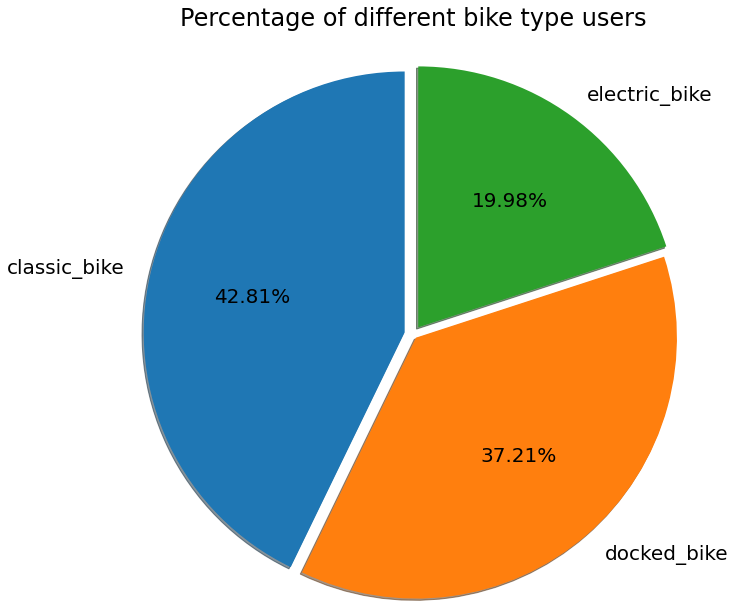

In [44]:
plt.pie(df['rideable_type'].value_counts(), labels= rideable_types,startangle=90, shadow= True, explode=(0.1,0.05,0.1), autopct='%1.2f%%', radius=3)
plt.title('Percentage of different bike type users', loc='center', pad= 200)
plt.rcParams['font.size'] = '20'

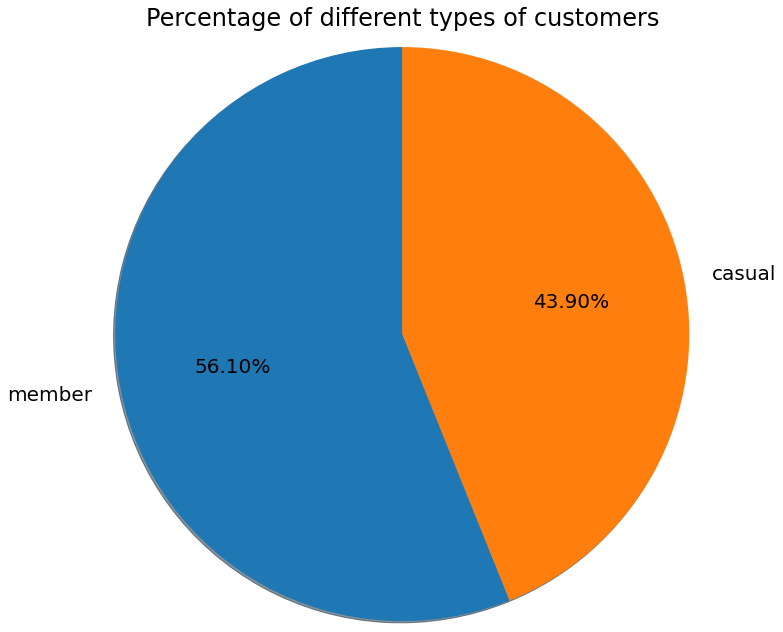

In [45]:
plt.pie(df['member_casual'].value_counts(), labels= ['member','casual'],startangle=90, shadow= True, autopct='%1.2f%%', radius= 3.3)
plt.title('Percentage of different types of customers', loc= 'center', pad=200)
plt.rcParams['font.size'] = '20'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, "Customer's choices for different rideable types")

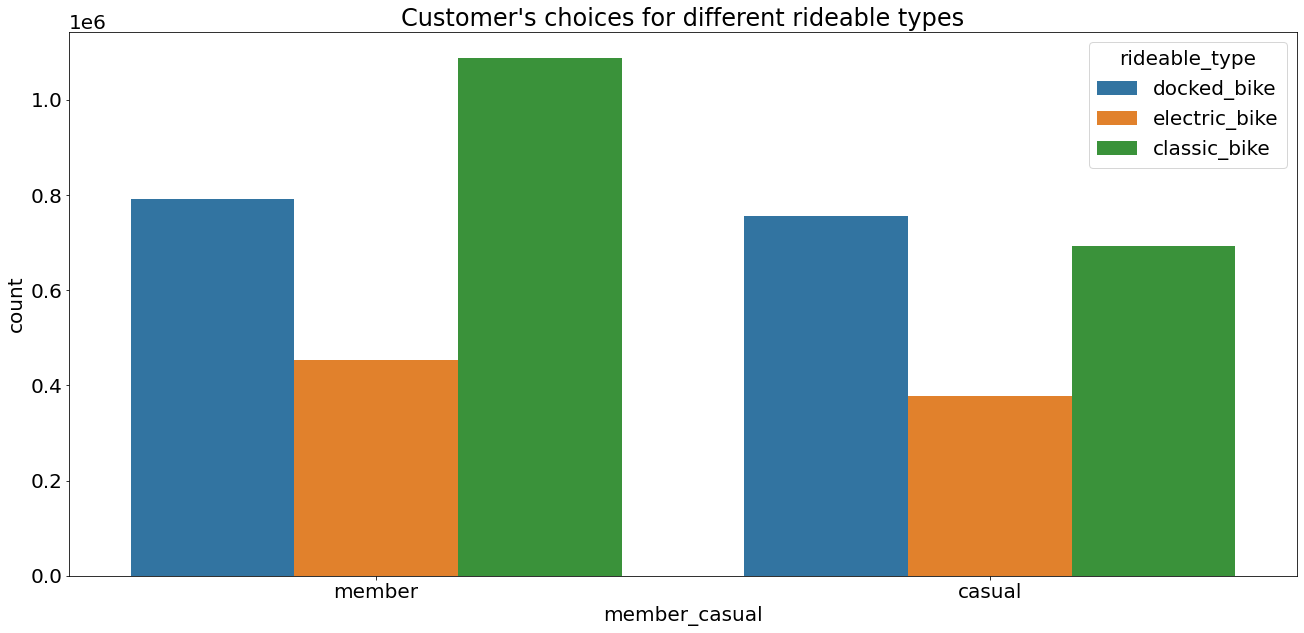

In [46]:
plt.figure(figsize=(22,10))
sns.countplot(df['member_casual'], hue=df['rideable_type'], data=df)
plt.title("Customer's choices for different rideable types")

Text(0.5, 1.0, 'Plot for number of customers and their trip duration in hours')

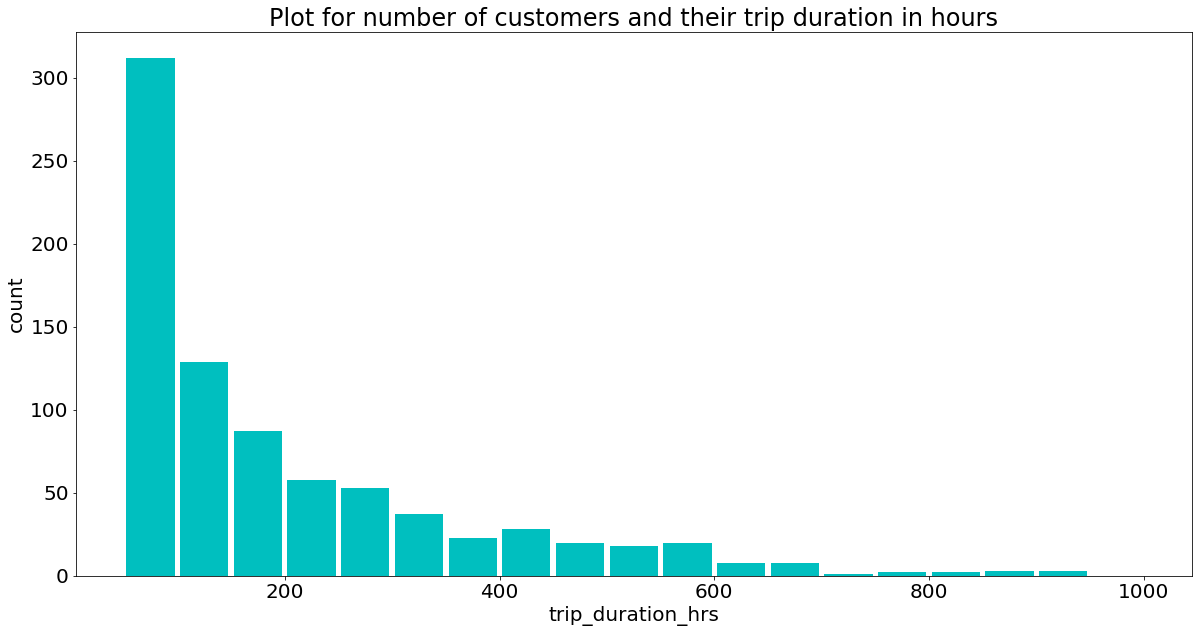

In [47]:
plt.figure(figsize=(20,10))
bins = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
plt.hist(df['trip_duration_hrs'].round(1), bins, histtype='bar',rwidth=0.9, color='c',stacked=True)
plt.xlabel('trip_duration_hrs')
plt.ylabel('count')
plt.title('Plot for number of customers and their trip duration in hours')

In [48]:
start_st=dict(df['start_station_name'].value_counts()) 
dfx=pd.DataFrame(data= {'start_station_name':list(start_st.keys()),'count':list(start_st.values())})
dfx.sort_values(by=['count'])
print(dfx)

                start_station_name  count
0          Streeter Dr & Grand Ave  64987
1        Lake Shore Dr & Monroe St  41836
2              Theater on the Lake  39520
3                Clark St & Elm St  38410
4            Michigan Ave & Oak St  37666
..                             ...    ...
726          Long Ave & Belden Ave      1
727         Long Ave & Belmont Ave      1
728          N Clark St & W Elm St      1
729  N Hampden Ct & W Diversey Ave      1
730       Central Ave & Parker Ave      1

[731 rows x 2 columns]


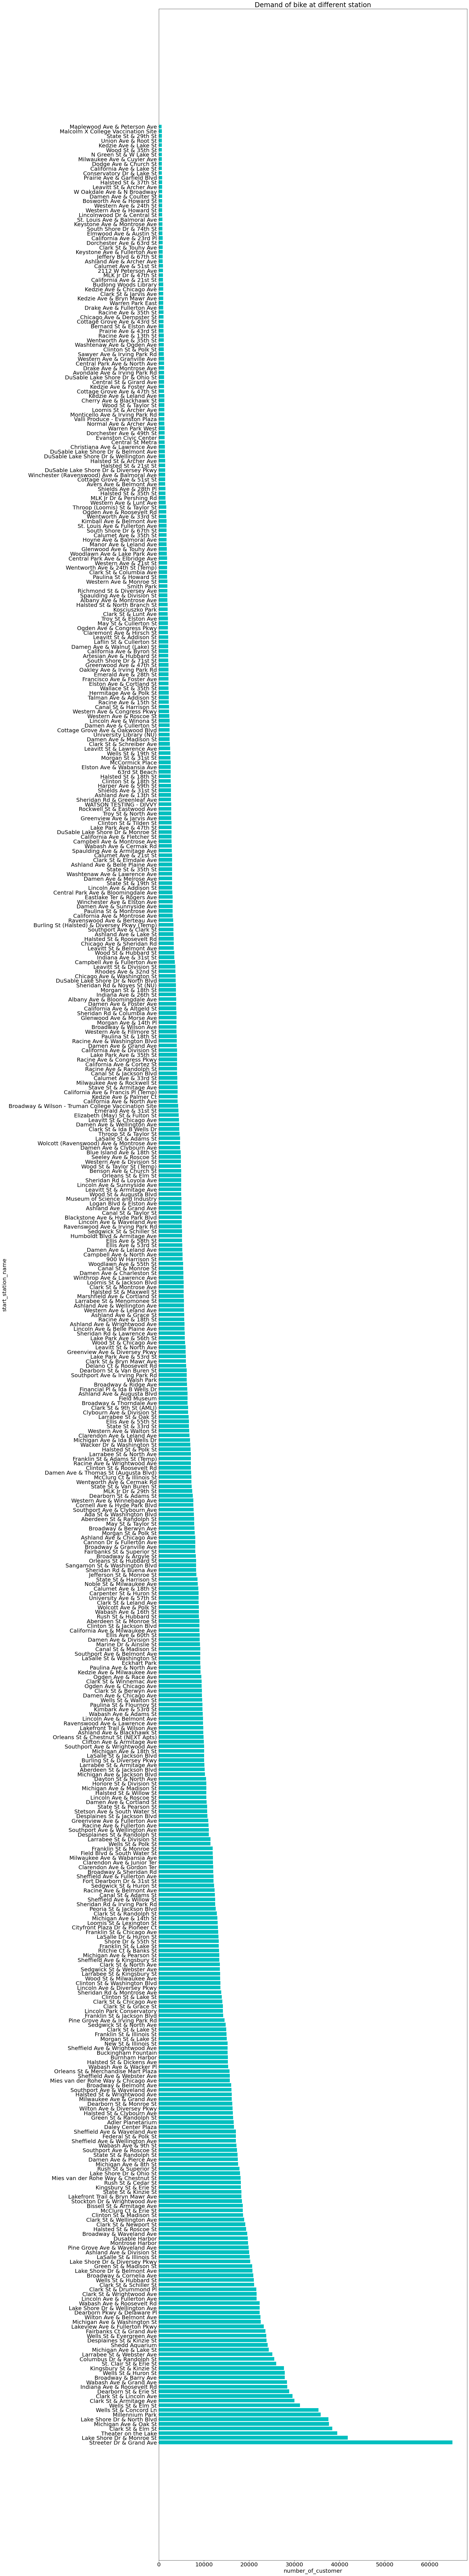

In [49]:
plt.figure(figsize=(20,170))
#plt.xticks(rotation=20) ##(to ratate the text)
plt.barh(dfx['start_station_name'].head(500), dfx['count'].head(500), color='c')
plt.ylabel('start_station_name')
plt.xlabel('number_of_customer')
plt.title('Demand of bike at different station')
plt.show()

Text(0.5, 1.0, "Customer's trip pattern")

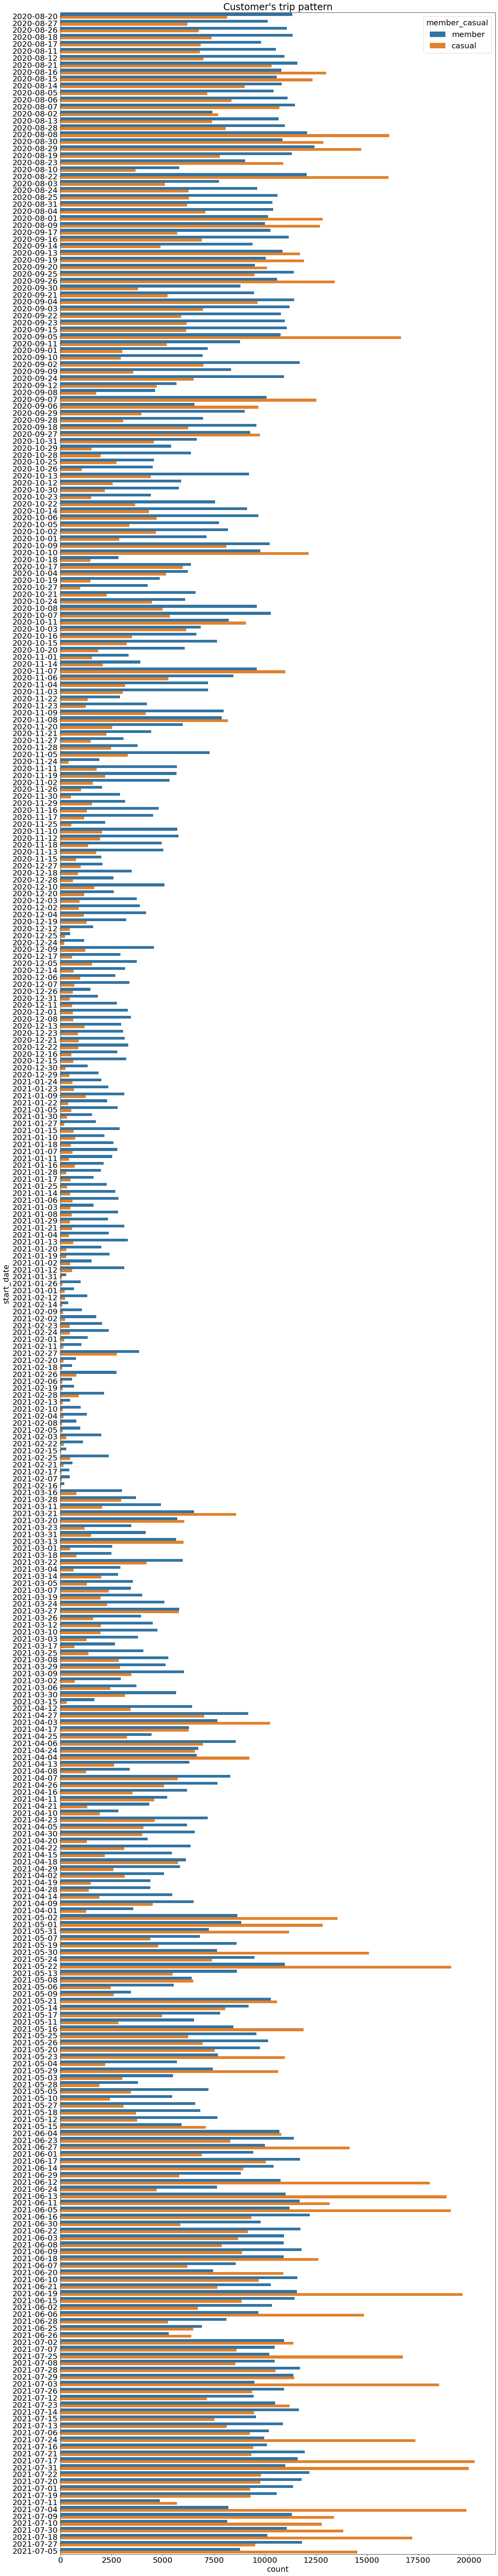

In [50]:
plt.figure(figsize=(20,120))
sns.countplot(y=df['start_date'], hue=df['member_casual'], data=df)
plt.title("Customer's trip pattern")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


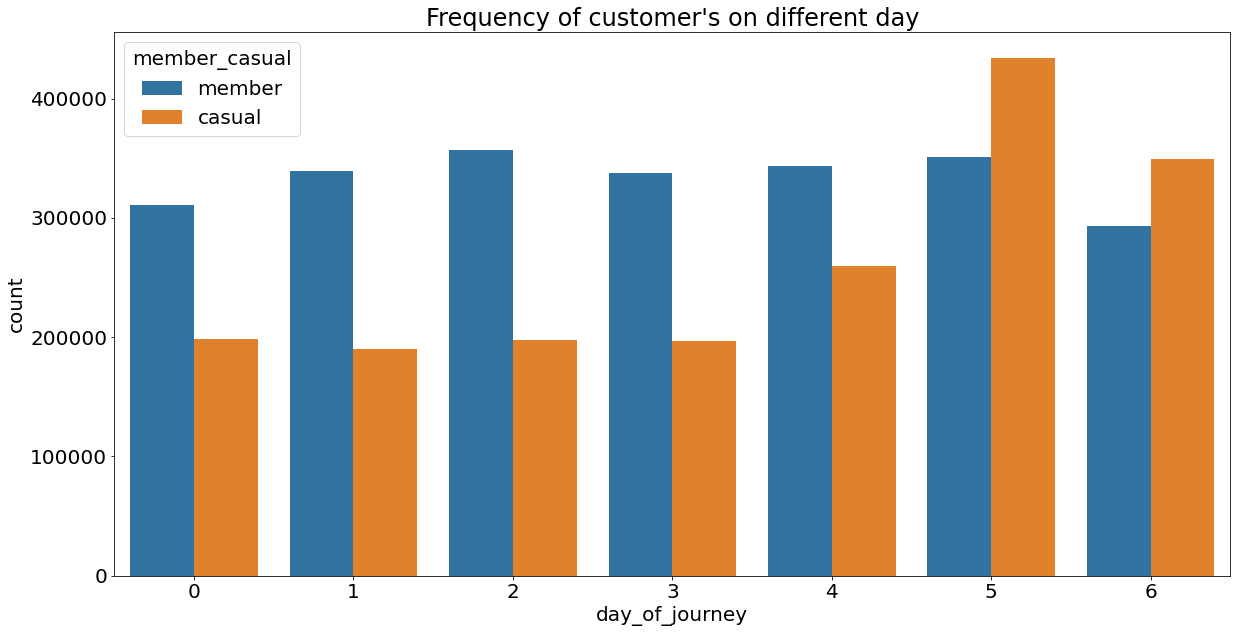

In [51]:
plt.figure(figsize=(20,10))
sns.countplot(df['day_of_journey'], hue=df['member_casual'], data=df)
plt.title("Frequency of customer's on different day")
plt.rcParams['font.size'] = '20'

**INSIGHTS**

1) The membership customer's preffered classic bikes.

2) The electric bike is less prefferd by both the type of customers.

3) Most of the customer's uses facilities of Cyclistic less than 200 hours per year.

4) The membership customer's uses facilities of Cyclistic almost all 7 days.

5) More number of casual customer's uses facilities of Cyclistic on Thursday(4), Friday(5) and Saturday(6).

6) The number of customers falls down in the months of December, January & February (especially casual customers).



**RECOMMENDATION**

1) Limit the number of uses on classic & docked bikes for casual customer's.

2) Offer gift to the customer's who uses the Cyclistic facilities most.

3) Dynamic fares on days like Thursday(4), Friday(5) and Saturday(6).

4) Offer half yearly membership at resonable cost to casual members.